In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [23]:
os.chdir('/Users/arneshbanerjee/Coding/Code/jupyter/Random Forest')

In [24]:
df1 = pd.read_csv('Social_Network_Ads.csv')
print (df1)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    11021175    Male   42           121315          0
1    17782313    Male   53            67214          0
2    14603818  Female   59           111005          0
3    18188198  Female   39            53414          0
4    19357305    Male   39           114285          0
..        ...     ...  ...              ...        ...
395  10220446  Female   20           141231          1
396  12387292    Male   50            75848          1
397  10715173  Female   25            82560          1
398  10016842    Male   55           147667          0
399  11699655  Female   54           134972          1

[400 rows x 5 columns]


In [25]:
x= df1.iloc [:,2:4].values
print (x) 

[[    42 121315]
 [    53  67214]
 [    59 111005]
 [    39  53414]
 [    39 114285]
 [    39 107458]
 [    20  85582]
 [    59 148335]
 [    48  80579]
 [    42 114204]
 [    32  87786]
 [    49 113544]
 [    55  88300]
 [    54 147066]
 [    57 139622]
 [    41 134716]
 [    51 116333]
 [    55  72567]
 [    44 123254]
 [    47 113548]
 [    52  79343]
 [    20 106149]
 [    40  59674]
 [    52  76333]
 [    28 118742]
 [    22 105897]
 [    25 114815]
 [    38  85428]
 [    57 114005]
 [    57 133402]
 [    43 106726]
 [    35  84550]
 [    34  96296]
 [    32  68964]
 [    55  90946]
 [    48  51787]
 [    22  53940]
 [    42 138928]
 [    59 116474]
 [    23  97284]
 [    40 132951]
 [    24 119308]
 [    50 120675]
 [    41 113547]
 [    52 102686]
 [    34 140262]
 [    20  54075]
 [    25  63715]
 [    46  56058]
 [    58  65052]
 [    38  72107]
 [    21 108656]
 [    42 120639]
 [    31  68033]
 [    26  80283]
 [    47  60952]
 [    31 123137]
 [    36  98529]
 [    25 12130

In [26]:
y = df1.iloc[:,4].values
print (y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


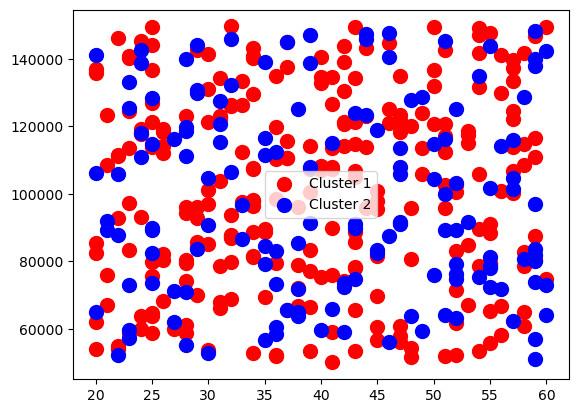

In [27]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
print(x)

[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [34]:
x_train, x_test, y_test, y_train = train_test_split(x,y,test_size = 0.2)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(320, 2)
(80, 2)
(80,)
(320,)


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (320, 2)
y_train shape: (320,)


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy') #n_estimators = 10 means only 10 decission trees are creates, defaults is 100
#criterion = 'entropy' ensures that the RandomForestClassifier selects the best split at each step by minimizing the entropy, resulting in a more accurate model.
rfc.fit (x_train,y_train)
print (rfc)

RandomForestClassifier(criterion='entropy', n_estimators=10)


In [38]:
y_pred = rfc.predict(x)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

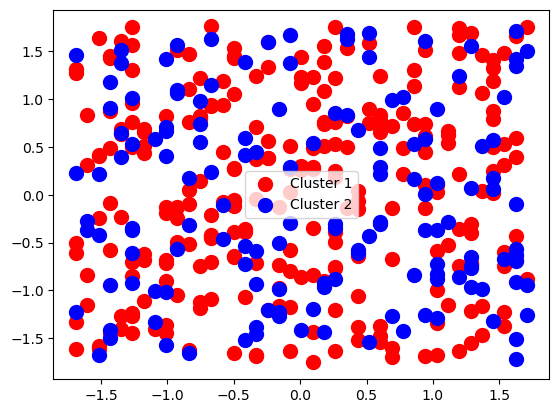

In [39]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

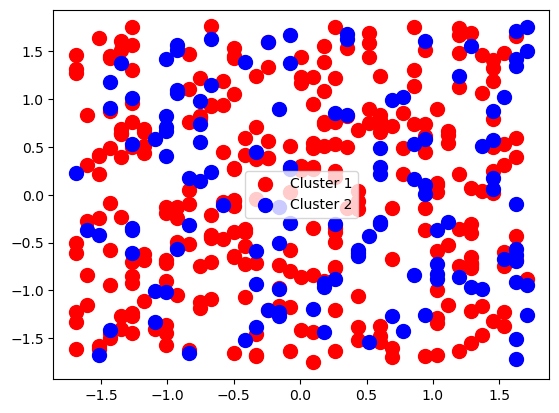

In [40]:
plt.scatter (x[y_pred == 0,0],x[y_pred == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_pred == 1,0],x[y_pred == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y,y_pred))

0.8975


In [42]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       257
           1       0.93      0.78      0.84       143

    accuracy                           0.90       400
   macro avg       0.91      0.87      0.88       400
weighted avg       0.90      0.90      0.90       400



In [43]:
cm = confusion_matrix (y,y_pred)
print (cm) 

[[248   9]
 [ 32 111]]


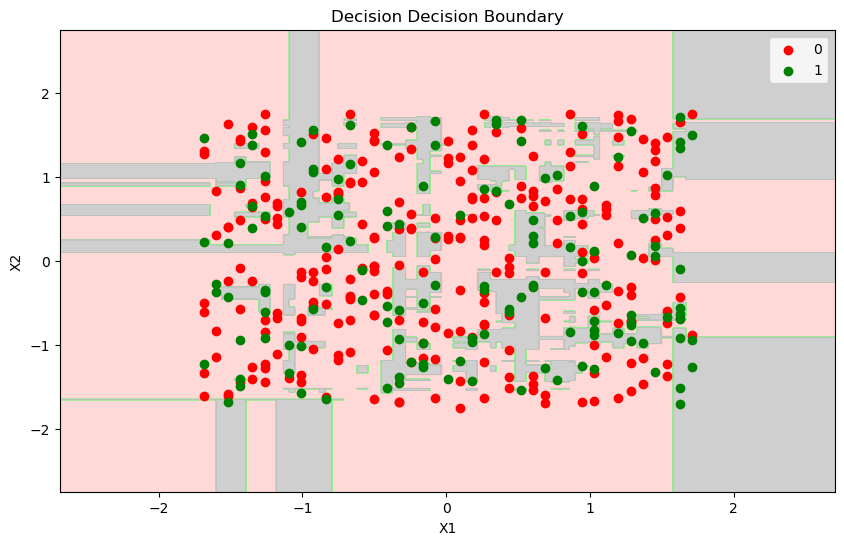

In [50]:
from matplotlib.colors import ListedColormap, to_rgb

zero_one_colourmap_pts = ListedColormap(('red', 'green'))
zero_one_colourmap_boundary = ListedColormap((to_rgb('#FFCCCB'), to_rgb('#90EE90'), to_rgb('#C0C0C0')))

def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = zero_one_colourmap_pts.colors[i], label = j)
  plt.title('Decision Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()
plot_decision_boundary(x, y, rfc)

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, criterion='gini')
#criterion=gini option ensures that the RandomForestClassifier selects the best split at each step by minimizing the Gini impurity, resulting in a more accurate model.
classifier.fit (x_train,y_train)
print (classifier)

RandomForestClassifier(n_estimators=5)


In [59]:
#Note: Gini impurity is simpler and faster to calculate than entropy, but entropy is more sensitive to changes in the dataset and may result in a more accurate model in some cases.

#Gini impurity ranges from 0 to 1, with 0 indicating a pure dataset and 1 indicating a completely impure dataset. 
#Entropy ranges from 0 to infinity, with 0 indicating a pure dataset and higher values indicating a more impure dataset.

In [60]:
y_pred= classifier.predict(x)
print (y_pred)

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1]


In [61]:
from sklearn.metrics import accuracy_score
print (accuracy_score (y,y_pred))

0.89


In [62]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       257
           1       0.87      0.82      0.84       143

    accuracy                           0.89       400
   macro avg       0.88      0.87      0.88       400
weighted avg       0.89      0.89      0.89       400



In [63]:
cm = confusion_matrix (y,y_pred)
print (cm)

[[239  18]
 [ 26 117]]
